# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 4: Predicting College Admissions

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css"
).text
HTML(styles)

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


<hr style="height:2pt">

### INSTRUCTIONS

- **THIS IS AN INDIVIDUAL ASSIGNMENT**. 

- To submit your assignment follow the instructions given in Canvas.

- This assignment **must be done individually**.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).
<hr style="height:2pt">

## Overview and Data Description

### Predicting admissions into elite universities

In this problem set we will model the chances of high school students being accepted into two different elite undergraduate colleges (one is elite at least :) ): Harvard and Yale.  The data are provided in the file `data/college_admissions.csv` and were scraped from [collegedata.com](https://www.collegedata.com/) (where applicants volunteer to share their information).  Each observation corresponds to an applicant to one of the two different colleges (note: the same applicant may show up in two rows: once for each college).  The main response is the `admitted` variable (1 = admitted, 0 = denied), and there are are several predictors to consider:

- **id**: a unique identifier for the applicant 
- **test**: a standardized measurement of the applicants highest ACT or SAT combined score (2400 is the maximum). 
- **ap**: the number of AP tests taken
- **avg_ap**: the average score on the AP tests taken (0 if no tests were taken)
- **sat_subjects**: the number of SAT subject tests taken
- **gpa**: the unweighted GPA of applicant (max of 4.0)
- **female**:  a binary indicator for gender: 1 = female, 0 = otherwise 
- **minority**: a binary indicator for under-represented minority: 1 = minority, 0 = otherwise 
- **international**: a binary indicator for international status: 1 = international, 0 = US
- **sports**: a binary indicator for HS All-American: 1 = all-American athlete, 0 = otherwise
- **school**: a categorical variable for school applied to: "Harvard" or "Yale"
- **early_app**: a binary indicator for application type: 1 = early action, 0 = regular
- **alumni**:  a binary indicator for parents' alumni status of school: 1 = a parent is an alumnus, 0 = otherwise
- **program**: the program applied to by the student with many choices (we will not use this as a predictor)
- **add_info**: additional (optional) info provided by applicant (we will not use this as a predictor)

The main set of 12 predictors is (note: you may need to modify this list when fitting different models, and your will be replacing the `school` variable with a binary `harvard` variable early in the questions below):

```python
[
    'test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','school','early_app','alumni'
]
```

Please use this dataset to answer the following questions below.

**Important notes:**

- **Unless stated otherwise, all logistic regression models should be unregularized (use `penalty="none"`) and include the intercept (which is the default in `sklearn`).**


- **When printing your output (e.g. coefficients, accuracy scores, etc.), DO NOT just print numbers without context. Please be certain provide clarifying labels for all printed numbers and limit the number of digits showing after decimals to a reasonable length (e.g. 4 decimal points for coefficients and accuracy scores).**


- **Also be sure to practice good data science principles: always use train to do analysis and never touch the test set until the very end.**

---

<div class='exercise'><b> Question 1 [16 pts]: Data Exploration using train and basic models </b></div>

The first step is to split the observations into an approximate 80-20 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits). It also prints the dataset's shape before splitting and after splitting. 

**IMPORTANT:** While a valid argument could be made to scale our predictors here, please **DO NOT** do so **UNTIL** it is requested of you in **question 4.1**.

**1.1** What proportion of observations were admitted overall?  What would be the classification accuracy for a baseline "naive" model where we classified ALL applicants as either admitted or not admitted using just this overall proportion to make our decision (i.e. we apply the same outcome to all applicants based on this proportion)?


**1.2** Create a binary ('dummy') variable named `harvard` that takes on the value 1 if `school == "Harvard"` and 0 otherwise. Now, explore the marginal association of each of our 12 predictors with whether or not an applicant is admitted into the college they applied (`admitted`).  Create a separate **visual** for each predictor to investigage their relationship with college admissions.  **Suggestion:** place these 12 visuals in a *matrix* of subplots with 3 columns and 4 rows.

**Note:** We will be using our dummified `harvard` predictor instead of `school` throughout the remainder of this problem set.

**1.3** Based on the visuals above, which predictor seems to have the most potential for predicting `admitted`? Why do you think this it the best potential single predictor?


**1.4** Fit a logistic regression to predict `admitted` from `harvard` (call it `logit1_4`).  Interpret the coefficient estimates: which college is estimated to be easier to get into?  What are the estimated chances of getting into each school?


**1.5** Create a contingency table between `admitted` and `harvard`.  Use this table to calculate and confirm the coefficient estimates in the `logit1_4` model (both the intercept and slope).


**1.6** Compare the estimated probabilities of being admitted into the schools to the overall acceptance rate (as seen [here](https://www.ivycoach.com/2023-ivy-league-admissions-statistics/)).  Why may what you've observed in this comparison be the case?


In [3]:
#############################
## DO NOT MODIFY THIS CODE ##
#############################

college = pd.read_csv('data/college_admissions.csv')
np.random.seed(121)

college_train, college_test, = train_test_split(
    college, test_size=0.2,  random_state = 121, shuffle=True, stratify = college['school']
)

print(college.shape)
print(college_train.shape, college_test.shape)

(1871, 16)
(1496, 16) (375, 16)


<div class='exercise-r'>  
 
**1.1** What proportion of observations were admitted overall?  What would be the classification accuracy for a baseline "naive" model where we classified ALL applicants as either admitted or not admitted using just this overall proportion to make our decision (i.e. we apply the same outcome to all applicants based on this proportion)?
 
 
 </div>

In [4]:
# your code here
# We use only the training dataset per Shucheng Yan's suggestion on Ed to calculate the proportion
# https://us.edstem.org/courses/2332/discussion/147620
proportion = college_train.admitted.mean()
print("The overall proportion of observations that were admitted: " + str(round(proportion,4)))
print("The train set classification accuracy for our naive model is: " + str(round(1-proportion,4)))
print("The test set classification accuracy for our naive model is: " + str(round(1-college_test.admitted.mean(),4)))

The overall proportion of observations that were admitted: 0.2627
The train set classification accuracy for our naive model is: 0.7373
The test set classification accuracy for our naive model is: 0.7013


Since the overall proportion of observations that were admitted is 0.2627 which is lower than 0.5, we would apply the same outcome of not admitted to all applicants. Since we know the overall proportion that was admitted, our naive model of predicting all applicants of having an outcome of not admitted would have a classification accuracy of 1-0.2627=0.7373 on the training set and on the test set we have a classification accuracy of 0.7013.

<div class='exercise-r'>  
 
**1.2** Create a binary ('dummy') variable named `harvard` that takes on the value 1 if `school == "Harvard"` and 0 otherwise. Now, explore the marginal association of each of our 12 predictors with whether or not an applicant is admitted into the college they applied (`admitted`).  Create a separate **visual** for each predictor to investigage their relationship with college admissions.  **Suggestion:** place these 12 visuals in a *matrix* of subplots with 3 columns and 4 rows.
 
 **Note:** We will be using our dummified `harvard` predictor instead of `school` throughout the remainder of this problem set.
 
 </div>

In [5]:
# your code here
# We create this dummy variables for all three data frames per Mike Sedelmeyer's suggestion on Ed
# https://us.edstem.org/courses/2332/discussion/144691
# Use pd.insert() to avoid SettingWithCopy warnings
# https://us.edstem.org/courses/2332/discussion/150709
for df in [college,college_train,college_test]:
    df.insert(loc=len(df.columns),column='harvard',value=pd.get_dummies(df['school']).Harvard)

(0.23, 0.45)

<Figure size 432x288 with 0 Axes>

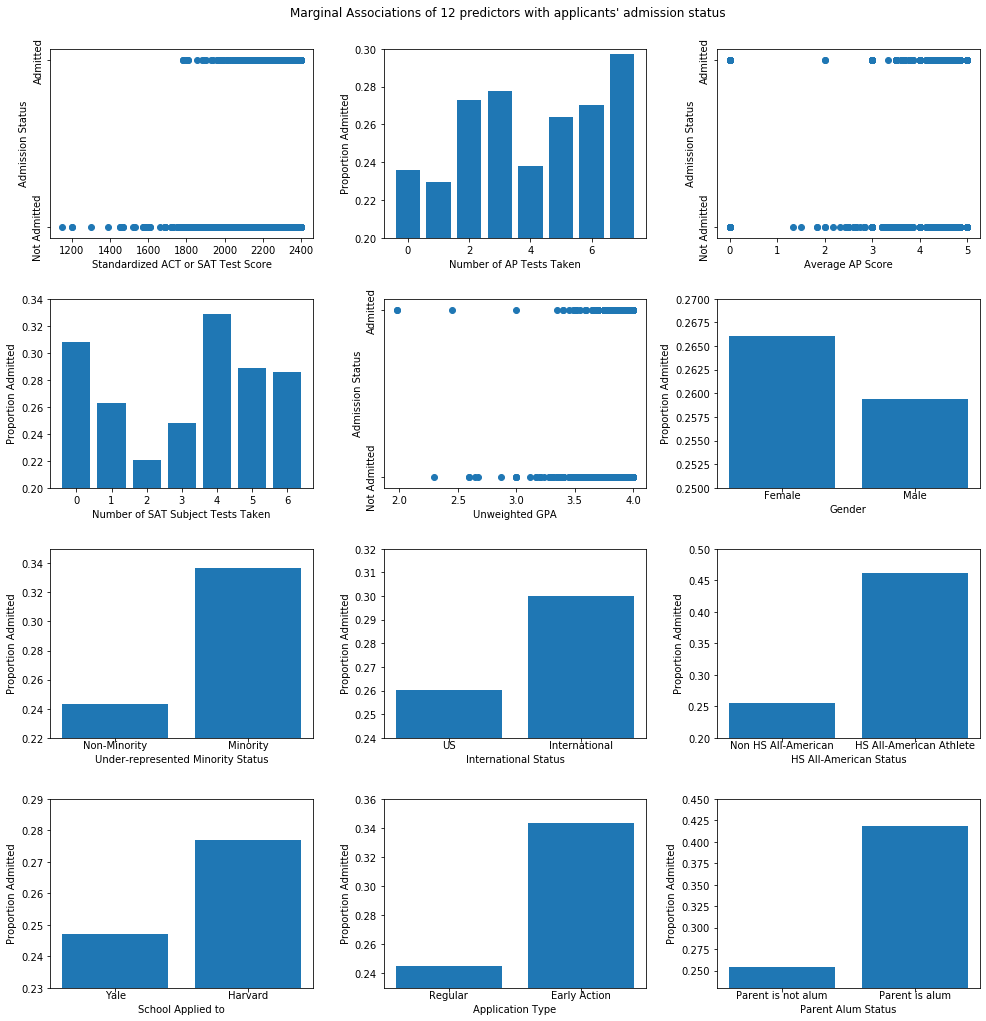

In [6]:
# your code here
fig = plt.figure()
fig, ax = plt.subplots(4,3)
fig.suptitle("Marginal Associations of 12 predictors with applicants' admission status")
fig.set_figwidth(15)
fig.set_figheight(15)
fig.tight_layout(pad=6,h_pad=4,w_pad=4)

for i in range(4):
    for j in range(3):
        ax[i][j].set_ylabel("Admission Status")

ax[0][0].scatter(college_train.test,college_train.admitted)
ax[0][0].set_xlabel("Standardized ACT or SAT Test Score")
ax[0][0].set_yticks([0,1])
ax[0][0].set_yticklabels(['Not Admitted', 'Admitted'],rotation=90,va='center')

ax[0][1].bar(college_train.ap.sort_values().unique(),college_train.groupby('ap').admitted.mean())
ax[0][1].set_xlabel("Number of AP Tests Taken")
ax[0][1].set_ylabel("Proportion Admitted")
ax[0][1].set_ylim(0.2,0.3)

ax[0][2].scatter(college_train.avg_ap,college_train.admitted)
ax[0][2].set_xlabel("Average AP Score")
ax[0][2].set_yticks([0,1])
ax[0][2].set_yticklabels(['Not Admitted', 'Admitted'],rotation=90,va='center')

ax[1][0].bar(college_train.sat_subjects.sort_values().unique(),college_train.groupby('sat_subjects').admitted.mean())
ax[1][0].set_xlabel("Number of SAT Subject Tests Taken")
ax[1][0].set_ylabel("Proportion Admitted")
ax[1][0].set_ylim(0.2,0.34)

ax[1][1].scatter(college_train.gpa,college_train.admitted)
ax[1][1].set_xlabel("Unweighted GPA")
ax[1][1].set_yticks([0,1])
ax[1][1].set_yticklabels(['Not Admitted', 'Admitted'],rotation=90,va='center')

ax[1][2].bar(college_train.female.sort_values().unique(),college_train.groupby('female').admitted.mean())
ax[1][2].set_xlabel("Gender")
ax[1][2].set_ylabel("Proportion Admitted")
ax[1][2].set_xticks([0,1])
ax[1][2].set_xticklabels(['Female', 'Male'],va='center')
ax[1][2].set_ylim(0.25,0.27)

ax[2][0].bar(college_train.minority.sort_values().unique(),college_train.groupby('minority').admitted.mean())
ax[2][0].set_xlabel("Under-represented Minority Status")
ax[2][0].set_ylabel("Proportion Admitted")
ax[2][0].set_xticks([0,1])
ax[2][0].set_xticklabels(['Non-Minority', 'Minority'],va='center')
ax[2][0].set_ylim(0.22,0.35)

ax[2][1].bar(college_train.international.sort_values().unique(),college_train.groupby('international').admitted.mean())
ax[2][1].set_xlabel("International Status")
ax[2][1].set_ylabel("Proportion Admitted")
ax[2][1].set_xticks([0,1])
ax[2][1].set_xticklabels(['US', 'International'],va='center')
ax[2][1].set_ylim(0.24,0.32)

ax[2][2].bar(college_train.sports.sort_values().unique(),college_train.groupby('sports').admitted.mean())
ax[2][2].set_xlabel("HS All-American Status")
ax[2][2].set_ylabel("Proportion Admitted")
ax[2][2].set_xticks([0,1])
ax[2][2].set_xticklabels(['Non HS All-American', 'HS All-American Athlete'],va='center')
ax[2][2].set_ylim(0.2,0.5)

ax[3][0].bar(college_train.harvard.sort_values().unique(),college_train.groupby('harvard').admitted.mean())
ax[3][0].set_xlabel("School Applied to")
ax[3][0].set_ylabel("Proportion Admitted")
ax[3][0].set_xticks([0,1])
ax[3][0].set_xticklabels(['Yale', 'Harvard'],va='center')
ax[3][0].set_ylim(0.23,0.29)

ax[3][1].bar(college_train.early_app.sort_values().unique(),college_train.groupby('early_app').admitted.mean())
ax[3][1].set_xlabel("Application Type")
ax[3][1].set_ylabel("Proportion Admitted")
ax[3][1].set_xticks([0,1])
ax[3][1].set_xticklabels(['Regular', 'Early Action'],va='center')
ax[3][1].set_ylim(0.23,0.36)

ax[3][2].bar(college_train.alumni.sort_values().unique(),college_train.groupby('alumni').admitted.mean())
ax[3][2].set_xlabel("Parent Alum Status")
ax[3][2].set_ylabel("Proportion Admitted")
ax[3][2].set_xticks([0,1])
ax[3][2].set_xticklabels(['Parent is not alum', 'Parent is alum'],va='center')
ax[3][2].set_ylim(0.23,0.45)

<div class='exercise-r'>  
 
**1.3** Based on the visuals above, which predictor seems to have the most potential for predicting `admitted`? Why do you think this it the best potential single predictor?
 
 
 </div>

**INTERPRETATION:**

The sports predictor seems to have the most potential for predicting admitted because, as we can see in the bar plot above, applicants in our test set who were a High School All-American Athlete were admitted at almost twice the rate of those who were not a High School All-American Athlete. This difference is the most extreme of any of the categorical variables. Our continous variables don't seem to be as effective predictors because even though at the low ends of their ranges it seems that they may be effective at predicting admission status, at the high ends of their ranges there doesn't seem to be any discernable difference in admission status. The intuition would be that perhaps these continuous variables are like thresholds where if an applicant is on the low end of the range we can have confidence in predicting that they won't be admitted, but if an applicant is on the high end of the range we are more uncertan of their admission status. Moreover, as a categorical variable this predictor also has the advantage of allowing us to explore interaction effects with other predictors.

<div class='exercise-r'>  
 
**1.4** Fit a logistic regression to predict `admitted` from `harvard` (call it `logit1_4`).  Interpret the coefficient estimates: which college is estimated to be easier to get into?  What are the estimated chances of getting into each school?
 
 
 </div>

In [7]:
# your code here
predictors = ['harvard']

# Create a logistic regression model, with 'none' as the penalty
# Fit the model using the training set
logit1_4 = LogisticRegression(penalty='none', max_iter = 5000).fit(college_train[predictors], college_train['admitted'])

# Get the coefficient estimates
print("Logistic Regression Estimated Beta (B0):",round(logit1_4.intercept_[0],4))
for i in range(len(predictors)):
    print("Logistic Regression Estimated Beta (B" + str(i+1) + ") for " + predictors[i] + ":",round(logit1_4.coef_[0][i],4))

Logistic Regression Estimated Beta (B0): -1.1137
Logistic Regression Estimated Beta (B1) for harvard: 0.1532


**INTERPRETATION:**

Our simple logistic regression is:
$$\log(\frac{P(Y=1)}{1-P(Y=1)})=-1.1137+0.1532X$$
where $Y=1$ is the event that an applicant is admitted and $X=1$ is the predictor variable for if the applicant applied to Harvard or $X=0$ is the predictor variable for if the applicant applied to Yale. Our intercept $\beta_0=-1.1137$ has the interpretation of the log odds of admission for applicants to Yale while our coefficient $\beta_1=0.1532$ has the interpretation of the difference in log odds of admission for applicants to Harvard versus applicants to Yale. Since log-odds are monotonically increasing and $\beta_1>0$, that implies that Harvard is estimated to be easier to get into. We can find the estimated chances by exponentiating our log odds for each categorical group. For Yale:
$$\exp(-1.1137)=\frac{P(Y=1)}{1-P(Y=1)}=0.328\to P(Y=1)=0.247$$
So there is a 0.328 estimated odds of getting into Yale, or an estimated chance (probability) of 0.247 of getting into Yale. For Harvard:
$$\exp(-1.1137+0.1532)=\frac{P(Y=1)}{1-P(Y=1)}=0.383\to P(Y=1)=0.277$$
So there is a 0.383 estimated odds of getting into Harvard, or an estimated chance (probability) of 0.277 of getting into Harvard.

<div class='exercise-r'>  
 
**1.5** Create a contingency table between `admitted` and `harvard`.  Use this table to calculate and confirm the coefficient estimates in the `logit1_4` model (both the intercept and slope).
 
 
 </div>

In [8]:
# your code here
pd.crosstab(college_train.harvard,college_train.admitted)

admitted,0,1
harvard,,
0,536,176
1,567,217


We can directly compute our probabilities as:
$$P(Y=1|X=0)=\frac{176}{536+176}=0.247\quad\quad P(Y=1|X=1)=\frac{217}{567+217}=0.277$$
which directly match our probabilities that we found in part 1.4, so we may mathematically compute the coefficient estimates to confirm them:
$$\hat{\beta}_0=\ln\Big(\frac{P(Y=1|X=0)}{1-P(Y=1|X=0)}\Big)=\ln\Big(\frac{0.247}{1-0.247}\Big)=-1.1147$$
$$\hat{\beta}_1=\ln\Big(\frac{P(Y=1|X=1)}{1-P(Y=1|X=1)}\Big)-\hat{\beta}_0=\ln\Big(\frac{0.277}{1-0.277}\Big)-(-1.1147)=0.1553$$
As we can see our mathematically computed coefficient estimates are approximately equal to the coefficient estimates in the model from 1.4, confirming our estimates.

**1.6** Compare the estimated probabilities of being admitted into the schools to the overall acceptance rate (as seen [here](https://www.ivycoach.com/2023-ivy-league-admissions-statistics/)).  Why may what you've observed in this comparison be the case?

**INTERPRETATION:**

Our estimated probability of being admitted into Yale is 0.247 and our estimated probability of being admitted into Harvard is 0.2777. However, the actual overall acceptance rate into these schools are about 5 times lower with Yale having an overall acceptance rate of 5.9\% and Harvard having an overall acceptance rate of 4.5\%. A likely explanation is that there is selection bias in our original dataset. After all, all applicants in the data set volunteered to share their information. We expect that applicants who are voluntarily sharing their information, even though it is anonymous, are generally the most qualified applicants and those who are engaged and interested enough in the college application process to be a contributor to the college application site "collegedata.com" resulting in our selection bias and higher estimated probabilities when compared to the true overall acceptance rate.

---

<div class='exercise'><b> Question 2 [18 pts]: Interpretable Modeling </b></div>

**2.1** Fit a logistic regression model to predict `admitted` from `test` alone (call it `logit2_1`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data). 

**2.2** What are the estimated chances of an applicant being admitted with an *average* `test` score of 2200?  What about if they had a perfect test score of 2400?  What test score would be needed to have a 50-50 chance of being admitted?

**2.3**  Fit a logistic regression model to predict `admitted` from `test` and `avg_ap` (call it `logit2_3`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data). 

**2.4** Interpret the coefficient estimates in `logit2_3` (not the intercept) and compare the coefficient estimate for `test` to the one from `logit2_1`.  Why has this estimate changed?

**Hint:** You may want to inspect the relationship between `test` and `avg_ap` to help get a better sense for what might be happening here.

**2.5** Interpret and compare the classification accuracies for the two models (`logit2_1` and `logit2_3`).  Explain why these accuracies are the same or different, and what about the data makes these accuracies so similar of different? 


<div class='exercise-r'>  
 
**2.1** Fit a logistic regression model to predict `admitted` from `test` alone (call it `logit2_1`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data).
 
 </div>

In [9]:
# your code here
# your code here
predictors = ['test']

# Create a logistic regression model, with 'none' as the penalty
# Fit the model using the training set
logit2_1 = LogisticRegression(penalty='none', max_iter = 5000).fit(college_train[predictors], college_train['admitted'])

# Get the coefficient estimates
print("Logistic Regression Estimated Beta (B0):",round(logit2_1.intercept_[0],4))
for i in range(len(predictors)):
    print("Logistic Regression Estimated Beta (B" + str(i+1) + ") for " + predictors[i] + ":",round(logit2_1.coef_[0][i],4))

# Compute the training and testng accuracy
logit2_1_train_accuracy = logit2_1.score(college_train[['test']],college_train.admitted)
logit2_1_test_accuracy = logit2_1.score(college_test[['test']],college_test.admitted)

print("Train Accuracy: " + str(round(logit2_1_train_accuracy,4)))
print("Test Accuracy: " + str(round(logit2_1_test_accuracy,4)))

Logistic Regression Estimated Beta (B0): -9.4136
Logistic Regression Estimated Beta (B1) for test: 0.0038
Train Accuracy: 0.7373
Test Accuracy: 0.7013


<div class='exercise-r'>  
 
**2.2** What are the estimated chances of an applicant being admitted with an *average* `test` score of 2200?  What about if they had a perfect test score of 2400?  What test score would be needed to have a 50-50 chance of being admitted?
 
 </div>

In [10]:
# your code here
predictions = logit2_1.predict_proba([[2200],[2400]])

print("Estimated chance of an applicant being admitted with an average test score of 2200: " 
    + str(round(predictions[0][1],4)))
print("Estimated chance of an applicant being admitted with a perfect test score of 2400: " 
    + str(round(predictions[1][1],4)))

Estimated chance of an applicant being admitted with an average test score of 2200: 0.2553
Estimated chance of an applicant being admitted with a perfect test score of 2400: 0.4226


*Your answer here*
We can directly calculate the test score using the estimated betas:
$$\ln\Big(\frac{P(Y=1)}{1-P(Y=1)}\Big)=\hat{\beta}_0+\hat{\beta}_1X$$
$$X=\frac{\Big(\ln\Big(\frac{P(Y=1)}{1-P(Y=1)}\Big)-\hat{\beta}_0\Big)}{\hat{\beta}_1}$$
Since we are looking for the 50-50 chance of being admitted we have $P(Y=1)=0.5$ so $\ln(\frac{P(Y=1)}{1-P(Y=1)})=\ln(\frac{0.5}{0.5})=0$. Thus we can solve for $X$ as:
$$X=\frac{-\hat{\beta}_0}{\hat{\beta}_1}$$

In [11]:
# your code here
print("Test score needed to have a 50-50 chance of being admitted is: "
      + str(round(-logit2_1.intercept_[0]/logit2_1.coef_[0][0],4)))

Test score needed to have a 50-50 chance of being admitted is: 2482.3446


**Interpretation:**

*Your answer here*

The applicant with an average test score of 2200 has the estimated chance of being admitted of 0.2553 while an applicant with a perfect test score of 2400 has an estimated chance of being admitted of 0.4226. Based on our model, we find that to have a 50-50 chance of being admitted, an applicant would need a test score of 2482.3446. Our maximum possible test score is 2400, so that means, based on our model, there is no possible test score that would achieve a 50-50 chance of being admitted and the best chance that one can achieve is 0.4226. So our range of possible chances of being admitted when estimated on test scores is (0, 0.4226). Moreover, it seems there is a significant increase in probabilities at the top range of test scores since the chance of being admitted almost doubles from 2200 to 2400.

<div class='exercise-r'>  
 
**2.3**  Fit a logistic regression model to predict `admitted` from `test` and `avg_ap` (call it `logit2_3`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data).
 
 </div>

In [12]:
# your code here
# your code here
predictors = ['test','avg_ap']

# Create a logistic regression model, with 'none' as the penalty
# Fit the model using the training set
logit2_3 = LogisticRegression(penalty='none', max_iter = 5000).fit(college_train[predictors], college_train['admitted'])

# Get the coefficient estimates
print("Logistic Regression Estimated Beta (B0):",round(logit2_3.intercept_[0],4))
for i in range(len(predictors)):
    print("Logistic Regression Estimated Beta (B" + str(i+1) + ") for " + predictors[i] + ":",round(logit2_3.coef_[0][i],4))

# Compute the training and testng accuracy
logit2_3_train_accuracy = logit2_3.score(college_train[['test','avg_ap']],college_train.admitted)
logit2_3_test_accuracy = logit2_3.score(college_test[['test','avg_ap']],college_test.admitted)

print("Train Accuracy: " + str(round(logit2_3_train_accuracy,4)))
print("Test Accuracy: " + str(round(logit2_3_test_accuracy,4)))

Logistic Regression Estimated Beta (B0): -0.0188
Logistic Regression Estimated Beta (B1) for test: -0.0005
Logistic Regression Estimated Beta (B2) for avg_ap: 0.0533
Train Accuracy: 0.7373
Test Accuracy: 0.7013


<div class='exercise-r'>  
 
**2.4** Interpret the coefficient estimates in `logit2_3` (not the intercept) and compare the coefficient estimate for `test` to the one from `logit2_1`.  Why has this estimate changed?
 
 **Hint:** You may want to inspect the relationship between `test` and `avg_ap` to help get a better sense for what might be happening here.
 
 </div>

Text(0, 0.5, 'Test Score')

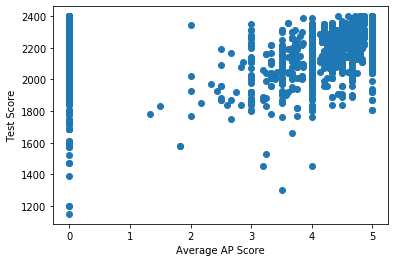

In [13]:
# your code here
plt.scatter(college_train.avg_ap,college_train.test)
plt.xlabel("Average AP Score")
plt.ylabel("Test Score")

**INTERPRETATION:**

*Your answer here*

For logit2_1 the coefficient estimate for test is 0.0038 and for logit2_3 the coefficient estimate for test is -0.0005. So it seems that our coefficient estimate became insignificant in logit2_3 while it was significant in logit2_1. The difference between the two models is that we've included avg_ap as an additional predictor variable in logit2_3. From the scatter plot above, we see that there is a fairly strong positive relationship between test and avg_ap. This makes intuitive sense, since if an applicant has a high test score they would also likely have a high average AP score as well. Because there is a strong relationship (in otherwords, collinearity) between these two predictor variables, including both of them in logit2_3 means that one of them will capture most of the effect of the other. In this case, the predictor variable avg_ap has a significant coefficient in logit2_3, while test has a near zero coefficient in logit2_3. Test became an insignificant predictor variable in logit2_3 because its strong relationship with avg_ap means that regressing avg_ap on admitted captures most of the effect of test on admitted.

<div class='exercise-r'>  
    
**2.5** Interpret and compare the classification accuracies for the two models (`logit2_1` and `logit2_3`).  Explain why these accuracies are the same or different, and what about the data makes these accuracies so similar of different?
</div>

**INTERPRETATION:**

*Your answer here*

For logit2_1 the classification accuracy on the training set is 0.7373 and on the testing set is 0.7013. For logit2_3 the classification accuracy on the training set is 0.7373 and on the testing set is 0.7013. It turns out that for both of the models we have the exact same classification accuracies, so it must mean that the two models are very similar in how they've fitted the training data and how they're predicting on the testing data. As we discussed in 2.4, avg_ap in logit2_3 captures the effect of test on admitted, so that means that adding avg_ap as an additional predictor doesn't increase the predictive power of our model because of the collinearity problem. That means that our logit2_3 model actually doesn't classify anymore observations correctly than our logit2_1 model which results in them having the exact same classification accuracies.

---

<div class='exercise'><b> Question 3 [30 pts]: Harvard and Yale? </b></div>


**3.1** Fit a logistic regression model (call it `logit3_1`) to predict `admitted` from 7 predictors: `['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority']`.  Output and interpret the coefficient estimates for the binary predictors in this model.

**Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.

**3.2** Fit a logistic regression model (call it `logit3_2`) to predict `admitted` from 3 predictors: `['harvard', 'test', 'ap']` along with the 2 interaction terms: `harvard` with `test` and `harvard` with `ap`. Name the columns for these interaction terms something sensible.  Print out the coefficient estimates for this model.

**3.3** Simplify and write out mathematically the above model from question 3.2 for 2 applicants: (1) someone who is applying to Harvard and for (2) someone who is applying to Yale (keep `test` and `ap` as the unknown $X$s).  The basic framework given to you below may be helpful:

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p $$

**Note:** All of your mathematical statements should be written out in your markdown cells [using LaTeX](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd). Do not insert images of handwritten math!

**3.4** Determine two classification boundaries mathematically for the model in the previous part (using the estimated coefficients): What range of values of `test` as a function of `ap` would an applicant be predicted to more likely than not be admitted into the college they applied? If a student scored a perfect 2400 on `test`, what is the minimum number of AP tests they should take in order to have a better than 50% chance of being admitted into Harvard?

**3.5** Create two separate scatterplots (one for Harvard applicants and one for Yale applicants) with the predictor `test` on the y-axis and `ap` on the x-axis where `admitted` is color-coded and the marker denotes train vs. test data.  Then add the appropriate classification boundary from the previous part.  Compare these two plots (both the location of the boundaries and where the points lie around these boundaries).

**Note:** As always, please be certain (a) your plot is titled, (b) everything is clearly labeled, and (c) the plot itself is formatted in a manner that makes it easy to read and interpret.

**3.6** Fit a logistic regression model (call it `logit3_6`) to predict `admitted` from 4 predictors: `['harvard', 'test', 'female', 'minority']` along with 2 interaction terms: `harvard` with `female` and `harvard` with `minority`.  Print out the coefficient estimates for this model.

**3.7** Interpret the coefficients associated with `female` and `minority` (the two main effects AND the two interaction terms).

**3.8** Based on this sample, how does it appear that Harvard and Yale compare in admitting these groups?  Why would it be wrong to take this interpretation as truth?

<div class='exercise-r'>  
 
**3.1** Fit a logistic regression model (call it `logit3_1`) to predict `admitted` from 7 predictors: `['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority']`.  Output and interpret the coefficient estimates for the binary predictors in this model.
 
 **Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.
 
 </div>

In [14]:
# your code here
predictors = ['harvard','test','ap','avg_ap','gpa','female','minority']

# Create a logistic regression model, with 'none' as the penalty
# Fit the model using the training set
logit3_1 = LogisticRegression(penalty='none', max_iter = 5000).fit(college_train[predictors], college_train['admitted'])

# Get the coefficient estimates
print("Logistic Regression Estimated Beta (B0):",round(logit3_1.intercept_[0],4))
for i in range(len(predictors)):
    print("Logistic Regression Estimated Beta (B" + str(i+1) + ") for " + predictors[i] + ":",round(logit3_1.coef_[0][i],4))

Logistic Regression Estimated Beta (B0): -1.1645
Logistic Regression Estimated Beta (B1) for harvard: 0.1435
Logistic Regression Estimated Beta (B2) for test: 0.003
Logistic Regression Estimated Beta (B3) for ap: -0.0235
Logistic Regression Estimated Beta (B4) for avg_ap: 0.0334
Logistic Regression Estimated Beta (B5) for gpa: -1.736
Logistic Regression Estimated Beta (B6) for female: -0.0349
Logistic Regression Estimated Beta (B7) for minority: 0.4572


**INTERPRETATION:**

*Your answer here*

Binary predictor variables can only take on values of 0s and 1s and we can imagine them as representing two different groups of observations. Therefore, the coefficient estimates for binary predictors are the difference in log-odds between the two groups. In logit3_1 we had three binary predictors: harvard, female, and minority. The coefficient estimate for harvard is 0.1435, so that means that applicants to Harvard have a 0.1435 greater log-odds of being admitted than applicants to Yale. The coefficient estimate for female is -0.0349, so that means that female applicants have a 0.0349 lower log-odds of being admitted than male applicants. The coefficient estimate for minority is 0.4572, so that means that minority applicants have a 0.4572 greater log-odds of being admitted than non-minority applicants.

<div class='exercise-r'>  
 
**3.2** Fit a logistic regression model (call it `logit3_2`) to predict `admitted` from 3 predictors: `['harvard', 'test', 'ap']` along with the 2 interaction terms: `harvard` with `test` and `harvard` with `ap`. Name the columns for these interaction terms something sensible.  Print out the coefficient estimates for this model.
 
 </div>

In [15]:
# your code here
# Create interaction terms and add them to our data frame
for df in [college,college_train,college_test]:
    df.insert(loc=len(df.columns),column='harvard_test',value=df.harvard*df.test)
    df.insert(loc=len(df.columns),column='harvard_ap',value=df.harvard*df.ap)

In [16]:
# your code here
predictors = ['harvard','test','ap','harvard_test','harvard_ap']

# Create a logistic regression model, with 'none' as the penalty
# Fit the model using the training set
logit3_2 = LogisticRegression(penalty='none', max_iter = 5000).fit(college_train[predictors], college_train['admitted'])

# Get the coefficient estimates
print("Logistic Regression Estimated Beta (B0):",round(logit3_2.intercept_[0],4))
for i in range(len(predictors)):
    print("Logistic Regression Estimated Beta (B" + str(i+1) + ") for " + predictors[i] + ":",round(logit3_2.coef_[0][i],4))

Logistic Regression Estimated Beta (B0): -7.1344
Logistic Regression Estimated Beta (B1) for harvard: -4.441
Logistic Regression Estimated Beta (B2) for test: 0.0027
Logistic Regression Estimated Beta (B3) for ap: 0.024
Logistic Regression Estimated Beta (B4) for harvard_test: 0.0022
Logistic Regression Estimated Beta (B5) for harvard_ap: -0.1101


<div class='exercise-r'>  
 
**3.3** Simplify and write out mathematically the above model from question 3.2 for 2 applicants: (1) someone who is applying to Harvard and for (2) someone who is applying to Yale (keep `test` and `ap` as the unknown $X$s).  The basic framework given to you below may be helpful:
 
 $$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p $$
 
 **Note:** All of your mathematical statements should be written out in your markdown cells [using LaTeX](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd). Do not insert images of handwritten math!
 
 </div>

**ANSWER:**

*Note: mathematical statements should be written using LaTeX.*

*Your answer here*

Let $[X_1,X_2,X_3]$ be our predictor variables for `['harvard', 'test', 'ap']`. Our general model is:
$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_1*X_2 + \beta_5X_1*X_3 $$
The model for an applicant who is applying to Harvard is (note we can simplify since $X_1=1$ for all applicants who are applying to Harvard):
$$ \ln \left( \frac{P(Y=1|X=1)}{1-P(Y=1|X=1)} \right) = \beta_0 + \beta_1 + (\beta_2+\beta_4)X_2 + (\beta_3+\beta_5)X_3 $$
Using our values of Beta from above we have:
$$ \ln \left( \frac{P(Y=1|X=1)}{1-P(Y=1|X=1)} \right) = -11.5754 + 0.0049X_2 -0.0861X_3 $$
The model for an applicant who is applying to Yale is (note we can simplify since $X_1=0$ for all applicants who are applying to Yale):
$$ \ln \left( \frac{P(Y=1|X=0}{1-P(Y=1|X=0)}\right) = \beta_0 + \beta_2X_2 + \beta_3X_3 $$
Using our values of Beta from above we have:
$$ \ln \left( \frac{P(Y=1|X=0}{1-P(Y=1|X=0)}\right) = -7.1344+0.0027X_2+0.024X_3$$

<div class='exercise-r'>  
 
**3.4** Determine two classification boundaries mathematically for the model in the previous part (using the estimated coefficients): What range of values of `test` as a function of `ap` would an applicant be predicted to more likely than not be admitted into the college they applied? If a student scored a perfect 2400 on `test`, what is the minimum number of AP tests they should take in order to have a better than 50% chance of being admitted into Harvard?
 
 </div>

**ANSWER:**

*Note: mathematical statements should be written using LaTeX.*

*Your answer here*

Recall from lecture 17 that our classification boundaries are found by setting $P(Y=1)=0.5$ so that our log-odds equal 0. We need to solve for two different classification boundaries depending on if an applicant applied to Harvard or Yale.

For the range of values of test as a function of ap, we calculate using our models above:

For Yale we have:
$$-7.1344+0.0027X_2+0.024X_3>0$$
And using our variable names we rewrite these as:
$$-7.1344+0.0027test+0.024ap>0$$
And we can rearrange to write test as a function of ap:
$$0.0027test>7.1344-0.024ap$$
$$test >
2642.3704-8.8889ap$$
This function gives a range of values of test as a function of ap. Our range of ap values for our dataset are (0,7) so if an applicant took no ap tests they would need a test score of over 2642.3704 to be more likely to be admitted than not admitted to Yale, which is the maximum of our range. If an applicant took 7 ap tests they would need a test score of over $2642.3704-8.8889(7)=2580.1481$ to be more likely to be admitted than not admitted to Yale, which is the minimum of our range.

For Harvard we have:
$$-11.5754 + 0.0049X_2 -0.0861X_3>0$$
And using our variable names we rewrite these as:
$$-11.5754 + 0.0049test -0.0861ap>0$$
And we can rearrange to write test as a function of ap:
$$0.0049test>11.5754 + 0.0861ap$$
$$test>2362.3265 + 17.5714ap$$
This function gives a range of values of test as a function of ap. Our range of ap values for our dataset are (0,7) so if an applicant took no ap tests they would need a test score of over 2,362.3265 to be more likely to be admitted than not admitted to Harvard, which is the minimum of our range. If an applicant took 7 ap tests they would need a test score of over $2362.3265+17.5714(7)=2485.3263$ to be more likely to be admitted than not admitted to Harvard, which is the maximum of our range.

Observe in the model for Harvard that we have negative coefficient on number of ap tests, so we are solving for the maximum number of ap tests an applicant with a perfect 2400 on test should take to have a better than 50% chance of being admitted to Harvard. We can use the classification boundary we found above by substituting 2400 as our value for test:
$$2400>2362.3265 + 17.5714ap$$
And then solve for ap:
$$17.5714ap<37.6735$$
$$ap<2.1440$$
Obviously, the number of ap tests is a discrete variable and since we are solving for the maximum number of ap tests, we round down our result and find that for an applicant with a perfect 2400 test score they can take a maximum of 2 ap tests to have a greater than 50% chance of being admitted to Harvard.

<div class='exercise-r'>  
 
**3.5** Create two separate scatterplots (one for Harvard applicants and one for Yale applicants) with the predictor `test` on the y-axis and `ap` on the x-axis where `admitted` is color-coded and the marker denotes train vs. test data.  Then add the appropriate classification boundary from the previous part.  Compare these two plots (both the location of the boundaries and where the points lie around these boundaries).
 
 **Note:** As always, please be certain (a) your plot is titled, (b) everything is clearly labeled, and (c) the plot itself is formatted in a manner that makes it easy to read and interpret.
 
 </div>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Library/Frame

<Figure size 432x288 with 0 Axes>

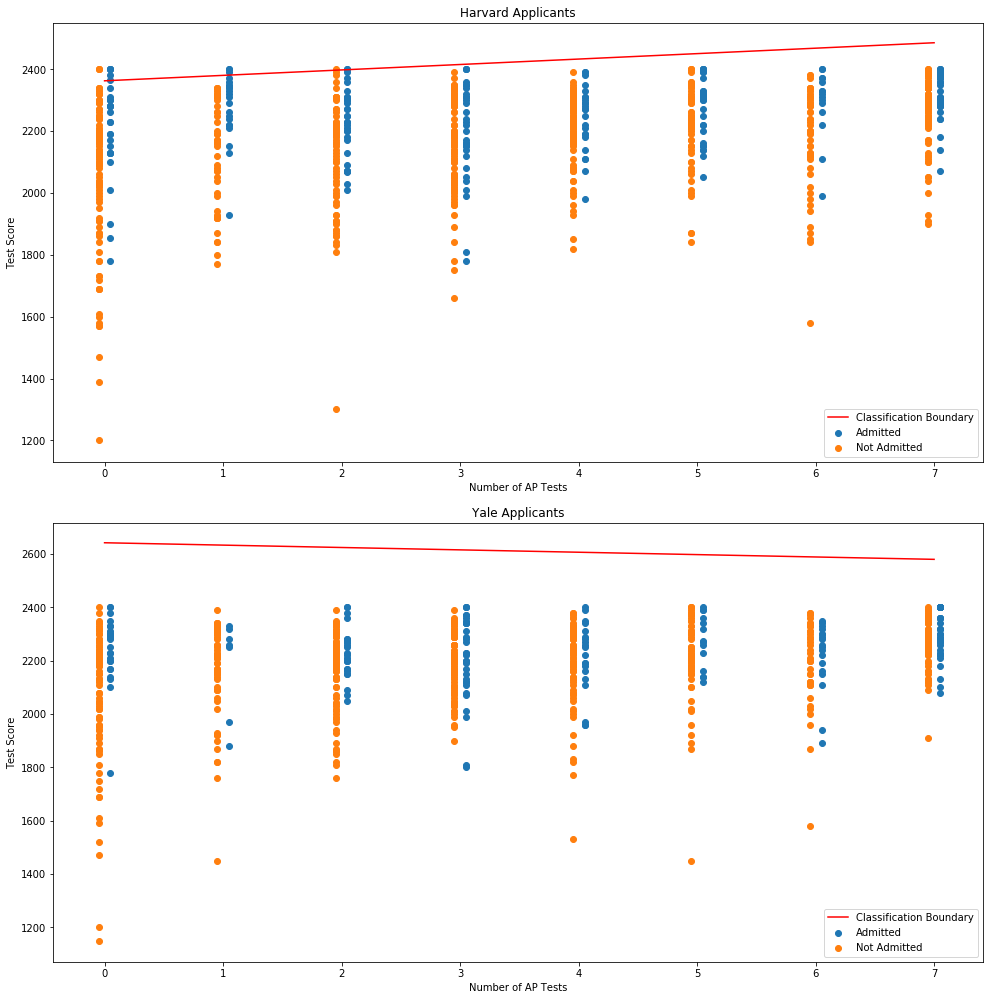

In [17]:
# your code here
fig = plt.figure()
fig, ax = plt.subplots(2,1)
fig.set_figwidth(15)
fig.set_figheight(15)
fig.tight_layout(pad=6,h_pad=4,w_pad=4)

# Note, so that it may be easier to distinguish between admitted and non-admitted observations
# We introduce slight horizontal deviations so that our scatter plot will be more interpretable

ax[0].set_title("Harvard Applicants")
ax[0].scatter(college_train[college_train['admitted']==1][college_train['harvard']==1]['ap']+0.05,
              college_train[college_train['admitted']==1][college_train['harvard']==1]['test'], label='Admitted')
ax[0].scatter(college_train[college_train['admitted']==0][college_train['harvard']==1]['ap']-0.05,
              college_train[college_train['admitted']==0][college_train['harvard']==1]['test'], label='Not Admitted')
ax[0].plot([0,7],[2362.3265,2485.3263],label='Classification Boundary', color='r')
ax[0].set_xlabel("Number of AP Tests")
ax[0].set_ylabel("Test Score")
ax[0].legend(loc="best")

ax[1].set_title("Yale Applicants")
ax[1].scatter(college_train[college_train['admitted']==1][college_train['harvard']==0]['ap']+0.05,
              college_train[college_train['admitted']==1][college_train['harvard']==0]['test'], label='Admitted')
ax[1].scatter(college_train[college_train['admitted']==0][college_train['harvard']==0]['ap']-0.05,
              college_train[college_train['admitted']==0][college_train['harvard']==0]['test'], label='Not Admitted')
ax[1].plot([0,7],[2642.3704,2580.1481],label='Classification Boundary', color='r')
ax[1].set_xlabel("Number of AP Tests")
ax[1].set_ylabel("Test Score")
ax[1].legend(loc="best")

**INTERPRETATION:**

*Your answer here*

For both of the classification boundaries an applicant would want to be above the line to have a greater than 50\% chance of being admitted. For both Harvard and Yale the location of the Classification Boundary is extremely high on the test values. From the scatterplots and the analysis above, it's impossible to be above the classification boundary for Yale, but possible for applicants to Harvard who've only take 0, 1, or 2 AP tests. The relationship between test scores and number of AP tests is also inverted between Harvard and Yale. Holding test scores constant, taking more AP tests increases your chances of being admitted while for Harvard the reverse is true, where holding test scores constant, taking more AP tests actually decreases your chances of being admitted.

<div class='exercise-r'>  
 
**3.6** Fit a logistic regression model (call it `logit3_6`) to predict `admitted` from 4 predictors: `['harvard', 'test', 'female', 'minority']` along with 2 interaction terms: `harvard` with `female` and `harvard` with `minority`.  Print out the coefficient estimates for this model.
 
 </div>

In [18]:
# your code here
# Create interaction terms and add them to our data frame
for df in [college,college_train,college_test]:
    df.insert(loc=len(df.columns),column='harvard_female',value=df.harvard*df.female)
    df.insert(loc=len(df.columns),column='harvard_minority',value=df.harvard*df.minority)

In [19]:
# your code here
predictors = ['harvard','test','female','minority','harvard_female','harvard_minority']

# Create a logistic regression model, with 'none' as the penalty
# Fit the model using the training set
logit3_6 = LogisticRegression(penalty='none', max_iter = 5000).fit(college_train[predictors], college_train['admitted'])

# Get the coefficient estimates
print("Logistic Regression Estimated Beta (B0):",round(logit3_6.intercept_[0],4))
for i in range(len(predictors)):
    print("Logistic Regression Estimated Beta (B" + str(i+1) + ") for " + predictors[i] + ":",round(logit3_6.coef_[0][i],4))

Logistic Regression Estimated Beta (B0): -10.6615
Logistic Regression Estimated Beta (B1) for harvard: 0.3864
Logistic Regression Estimated Beta (B2) for test: 0.0042
Logistic Regression Estimated Beta (B3) for female: 0.0184
Logistic Regression Estimated Beta (B4) for minority: 1.4378
Logistic Regression Estimated Beta (B5) for harvard_female: 0.0777
Logistic Regression Estimated Beta (B6) for harvard_minority: -1.0612


<div class='exercise-r'>  
 
**3.7** Interpret the coefficients associated with `female` and `minority` (the two main effects AND the two interaction terms).
 
 </div>

**INTERPRETATION:**

*Your answer here*

Female and minority are binary predictor variables so the coefficients for their main effects have the same interpretation as described in problem 3.1. The coefficient for the main effect of female is 0.0184 is interpreted as female applicants have a 0.0184 greater log-odds of being admitted than male applicants. Similarly, the coefficient for the main effect of minority is 1.14378 is interpreted as minority applicants have a 1.4378 greater log-odds of being admitted than non-minority applicants. For the two interaction terms, their coefficients describe the change in log-odds effects of one predictor variable on another predictor variable. More concretely, the coefficient of 0.0777 on harvard_female means that a female applicant applying to Harvard has a 0.0777+0.0184=0.0961 greater log-odds of being admitted than a male applicant to Harvard or a 0.0777+0.3864=0.4641 greater log-odds of being admitted than a female applicant to Yale. Similarly, the coefficient of -1.0612 on harvard_minority means that a minority applicant to Harvard has a -1.0612+1.4378=0.3766 greater log-odds of being admitted than a non-minority applicant to Harvard an a -1.0612+0.3864=-0.6748 lower log-odds of being admitted than a minority applicant to Yale.

**3.8** Based on this sample, how does it appear that Harvard and Yale compare in admitting these groups?  Why would it be wrong to take this interpretation as truth?

**INTERPRETATION:**

*Your answer here*

From the main effects it appears that both female applicants and minority applicants have a greater chance of being admitted to Harvard and Yale than their counterparts. But it appears from the interaction terms that female applicants to Harvard have a greater chance of being admitted than female applicants to Yale. The reverse is true where minority applicants to Yale have a greater chance of being admitted than minority applicants to Harvard. It would be wrong to take this interpretation as the truth since, as we discussed before, there are significant problems with this data set. Also we haven't rigorously tested this model to see if it really is providing us with good results.

---

<div class='exercise'><b> Question 4 [24 pts]: Building Predictive Models for admitted </b></div>

**4.1** You were instructed to NOT scale predictors in the prior sections above. The primary reason for this was to focus instead on the interpretability of our logistic regression coefficients. However, as we're sure you noticed, the numeric scale among our different predictors varies greatly (i.e. `test` values are in the 1,000's while others are much, much smaller). In practice, we might want to put our predictors all on a similar scale, particularly for regression and/or distance-based algorithms such as $k$-NN classification. (1) Please explain why scaling under these circumstances might be important. Then, (2) actually apply standardized scaling to all of the **non-binary** predictors in our original set of 12 predictors (for both the training and test sets).

**Note:** These scaled predictors should be used instead of the original unscaled versions of the predictors for the remainder of this problem set.

**4.2** Fit a well-tuned $k$-NN classification model with main effects of all 12 predictors in it (call it `knn_model`).  Use `ks = [1,3,5,9,15,21,51,71,101,151,201]` and 3-fold cross-validation. Plot, on a single set of axes, your resulting cross-validation mean training and mean validation scores at each value $k$. Then, report your chosen $k$ and the classification accuracy on train and test for your final fitted model.

**4.3** Fit the full logistic regression model with main effects of all 12 predictors in it (call it `logit_full`). Print out the coefficient estimates and report the classification accuracy on train and test for this model.

**4.4** Fit a well-tuned Lasso-like logistic regression model from all 12 predictors in it (call it `logit_lasso`). Use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation.  Print out the coefficient estimates and report the classification accuracy on train and test for this model.

**4.5** Which predictors were deemed important in `logit_lasso`?  Which were deemed unimportant? 

**4.6** Fit a well-tuned Lasso-like logistic regression model with all important predictors from `logit_lasso` and all the 2-way interactions between them (call it `logit_lasso_interact`).  Again use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation. Report the classification accuracy on train and test for this model.

**4.7** How many of the predictors in our `logit_lasso_interact` model were deemed important and unimportant? (Feel free to just report on the number of them found to be important and unimportant. There is no need to list them all here.)

**Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.

<div class='exercise-r'>  
 
**4.1** You were instructed to NOT scale predictors in the prior sections above. The primary reason for this was to focus instead on the interpretability of our logistic regression coefficients. However, as we're sure you noticed, the numeric scale among our different predictors varies greatly (i.e. `test` values are in the 1,000's while others are much, much smaller). In practice, we might want to put our predictors all on a similar scale, particularly for regression and/or distance-based algorithms such as $k$-NN classification. (1) Please explain why scaling under these circumstances might be important. Then, (2) actually apply standardized scaling to all of the **non-binary** predictors in our original set of 12 predictors (for both the training and test sets).
 
 **Note:** These scaled predictors should be used instead of the original unscaled versions of the predictors for the remainder of this problem set.
 
 </div>

**INTERPRETATION:**

*your answer here*

Standardizing data is important in making the intercept interpretable, since standardized data has mean zero whereas for non-standardized data there is no consistent interpretation for zero for all of our predictors. Moreover, it makes our predictor variables more comparable since they will all be on roughly the same scale, even for the binary predictor variables. For instance, test is on a 1200-2400 scale so the intercept of zero for test is not well-interpretable and the huge scale for test makes it difficult to offer good comparisons with the other predictor variables like gpa or average ap score. Finally, for KNN Regression this is very important since predictor variables with large scales will have much a greater effect on our KNN Regression than for other predictor variables, where as standardizing all our variables ensures that all our variables have about equal effects.

In [20]:
# your code here
non_binary = ['test','ap','avg_ap','sat_subjects','gpa']

# Used sklearn documentation for StandardScaler to standardize the 5 non-binary predictor variables
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Per Mike Sedelmeyer's discussion on Ed, we fit our StandardScaler to the training data and then use
# the fitted scaler to standardize our data for all three of our data frames
# https://us.edstem.org/courses/2332/discussion/152877
for predictor in non_binary:
    scaler = StandardScaler()
    scaler.fit(college_train[[predictor]])
    for df in [college,college_train,college_test]:
        df.insert(loc=len(df.columns),column='std_'+predictor,value=scaler.transform(df[[predictor]]))
#        df[predictor] = scaler.transform(df[[predictor]])

<div class='exercise-r'>  
 
**4.2** Fit a well-tuned $k$-NN classification model with main effects of all 12 predictors in it (call it `knn_model`).  Use `ks = [1,3,5,9,15,21,51,71,101,151,201]` and 3-fold cross-validation. Plot, on a single set of axes, your resulting cross-validation mean training and mean validation scores at each value $k$. Then, report your chosen $k$ and the classification accuracy on train and test for your final fitted model.
 
 </div>

In [21]:
np.random.seed(121) # Do not delete or modify this line of code

# your code here
knn_predictors = ['std_test','std_ap','std_avg_ap','std_sat_subjects',
              'std_gpa','female','minority','international',
              'sports','harvard','early_app','alumni']
ks = [1,3,5,9,15,21,51,71,101,151,201]

# Empty lists to store training and cross-validation scores
train_scores = []
cv_scores = []

for k in ks:
    # define the model
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # fit to the data
    knn_model.fit(college_train[knn_predictors],college_train['admitted'])

    # Compute the training & cross-validation scores
    knn_model_train_score = knn_model.score(college_train[knn_predictors], college_train['admitted'])
    knn_model_cv_score = cross_validate(knn_model,college_train[knn_predictors],college_train['admitted'],cv=3,scoring='accuracy')

    train_scores.append(knn_model_train_score)
    cv_scores.append(np.mean(abs(knn_model_cv_score['test_score'])))

The best k is: 15
With a cross-validation classification accuracy of: 0.7393
With a training classification accuracy of: 0.752
With a testing classification accuracy of: 0.7307


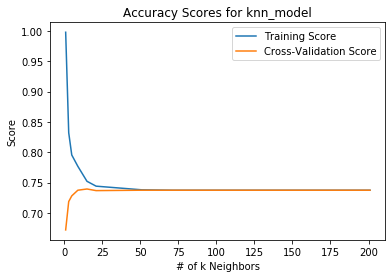

In [22]:
# your code here
plt.plot(ks, train_scores, label = 'Training Score')
plt.plot(ks, cv_scores, label = 'Cross-Validation Score')
plt.legend()
plt.title("Accuracy Scores for knn_model")
plt.xlabel('# of k Neighbors')
plt.ylabel('Score')

# The best k with the best cross validation score
best_score = max(cv_scores)
best_k = ks[cv_scores.index(best_score)]

# Refit model using chosen k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(college_train[knn_predictors],college_train['admitted'])

# Compute the testing score
knn_model_test_score = knn_model.score(college_test[knn_predictors], college_test['admitted'])

print("The best k is: " + str(best_k))
print("With a cross-validation classification accuracy of: " + str(round(best_score,4)))
print("With a training classification accuracy of: " + str(round(train_scores[cv_scores.index(best_score)],4)))
print("With a testing classification accuracy of: " + str(round(knn_model_test_score,4)))

<div class='exercise-r'>  
 
**4.3** Fit the full logistic regression model with main effects of all 12 predictors in it (call it `logit_full`). Print out the coefficient estimates and report the classification accuracy on train and test for this model.
 
 </div>

In [23]:
# your code here
logit_predictors = ['std_test','std_ap','std_avg_ap','std_sat_subjects',
              'std_gpa','female','minority','international',
              'sports','harvard','early_app','alumni']

# Create a logistic regression model, with 'none' as the penalty
# Fit the model using the training set
logit_full = LogisticRegression(penalty='none', max_iter = 5000).fit(college_train[logit_predictors], college_train['admitted'])

# Get the coefficient estimates
print("Logistic Regression Estimated Beta (B0):",round(logit_full.intercept_[0],4))
for i in range(len(logit_predictors)):
    print("Logistic Regression Estimated Beta (B" + str(i+1) + ") for " + logit_predictors[i] + ":",round(logit_full.coef_[0][i],4))
    
# Compute the training & testing scores
logit_full_train_score = logit_full.score(college_train[logit_predictors],college_train['admitted'])
logit_full_test_score = logit_full.score(college_test[logit_predictors],college_test['admitted'])

print("logit_full training classification accuracy: " + str(round(logit_full_train_score,4)))
print("logit_full testing classification accuracy: " + str(round(logit_full_test_score,4)))

Logistic Regression Estimated Beta (B0): -1.709
Logistic Regression Estimated Beta (B1) for std_test: 0.7838
Logistic Regression Estimated Beta (B2) for std_ap: -0.1403
Logistic Regression Estimated Beta (B3) for std_avg_ap: 0.0975
Logistic Regression Estimated Beta (B4) for std_sat_subjects: -0.0952
Logistic Regression Estimated Beta (B5) for std_gpa: 0.1056
Logistic Regression Estimated Beta (B6) for female: 0.0518
Logistic Regression Estimated Beta (B7) for minority: 0.9165
Logistic Regression Estimated Beta (B8) for international: 0.45
Logistic Regression Estimated Beta (B9) for sports: 1.2334
Logistic Regression Estimated Beta (B10) for harvard: 0.2581
Logistic Regression Estimated Beta (B11) for early_app: 0.3737
Logistic Regression Estimated Beta (B12) for alumni: 0.6629
logit_full training classification accuracy: 0.7453
logit_full testing classification accuracy: 0.7147


<div class='exercise-r'>  
 
**4.4** Fit a well-tuned Lasso-like logistic regression model from all 12 predictors in it (call it `logit_lasso`). Use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation.  Print out the coefficient estimates and report the classification accuracy on train and test for this model.
 
 </div>

In [24]:
# your code here
lasso_predictors = ['std_test','std_ap','std_avg_ap','std_sat_subjects',
              'std_gpa','female','minority','international',
              'sports','harvard','early_app','alumni']

Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]

# define the model
#logit_lasso = LogisticRegressionCV(Cs=Cs,cv=3,max_iter=5000,scoring='accuracy')

# fit to the data
#logit_lasso.fit(college_train[predictors],college_train['admitted'])
#print(logit_lasso.score(college_train[predictors],college_train['admitted']))

# Empty lists to store training and cross-validation scores
train_scores = []
cv_scores = []

for C in Cs:
    # define the model
    logit_lasso = LogisticRegression(C=C, max_iter=5000,penalty='l1',solver='liblinear')

    # fit to the data
    logit_lasso.fit(college_train[lasso_predictors],college_train['admitted'])

    # Compute the training & cross-validation scores
    logit_lasso_train_score = logit_lasso.score(college_train[lasso_predictors], college_train['admitted'])
    logit_lasso_cv_score = cross_validate(logit_lasso,college_train[lasso_predictors],college_train['admitted'],cv=3,scoring='accuracy')

    train_scores.append(logit_lasso_train_score)
    cv_scores.append(np.mean(abs(logit_lasso_cv_score['test_score'])))

In [25]:
# your code here
# The best C with the best cross validation score
best_score = max(cv_scores)
best_C = Cs[cv_scores.index(best_score)]

# Refit model using chosen C
logit_lasso = LogisticRegression(C=best_C, max_iter=5000,penalty='l1',solver='liblinear')
logit_lasso.fit(college_train[lasso_predictors],college_train['admitted'])

# Compute the testing score
logit_lasso_test_score = logit_lasso.score(college_test[lasso_predictors], college_test['admitted'])

print("The best C is: " + str(best_C))
# Get the coefficient estimates
print("Lasso-like Logistic Regression Estimated Beta (B0):",round(logit_lasso.intercept_[0],4))
for i in range(len(lasso_predictors)):
    print("Logistic Regression Estimated Beta (B" + str(i+1) + ") for " + lasso_predictors[i] + ":",round(logit_lasso.coef_[0][i],4))
# Get the classification accuracies
print("With a cross-validation classification accuracy of: " + str(round(best_score,4)))
print("With a training classification accuracy of: " + str(round(train_scores[cv_scores.index(best_score)],4)))
print("With a testing classification accuracy of: " + str(round(logit_lasso_test_score,4)))

The best C is: 10.0
Lasso-like Logistic Regression Estimated Beta (B0): -1.7014
Logistic Regression Estimated Beta (B1) for std_test: 0.7819
Logistic Regression Estimated Beta (B2) for std_ap: -0.1388
Logistic Regression Estimated Beta (B3) for std_avg_ap: 0.0952
Logistic Regression Estimated Beta (B4) for std_sat_subjects: -0.0943
Logistic Regression Estimated Beta (B5) for std_gpa: 0.1045
Logistic Regression Estimated Beta (B6) for female: 0.0493
Logistic Regression Estimated Beta (B7) for minority: 0.9121
Logistic Regression Estimated Beta (B8) for international: 0.4403
Logistic Regression Estimated Beta (B9) for sports: 1.2214
Logistic Regression Estimated Beta (B10) for harvard: 0.2545
Logistic Regression Estimated Beta (B11) for early_app: 0.3701
Logistic Regression Estimated Beta (B12) for alumni: 0.6563
With a cross-validation classification accuracy of: 0.74
With a training classification accuracy of: 0.7453
With a testing classification accuracy of: 0.7147


<div class='exercise-r'>  
 
**4.5** Which predictors were deemed important in `logit_lasso`?  Which were deemed unimportant?
 
 </div>

In [26]:
# your code here
important = []
unimportant = []

for i in range(len(lasso_predictors)):
    if abs(logit_lasso.coef_[0][i])==0:
        unimportant.append(lasso_predictors[i])
    else:
        important.append(lasso_predictors[i])

print("Important predictors: " + str(important))
print("Unimportant predictors: " + str(unimportant))

Important predictors: ['std_test', 'std_ap', 'std_avg_ap', 'std_sat_subjects', 'std_gpa', 'female', 'minority', 'international', 'sports', 'harvard', 'early_app', 'alumni']
Unimportant predictors: []


<div class='exercise-r'>  
 
**4.6** Fit a well-tuned Lasso-like logistic regression model with all important predictors from `logit_lasso` and all the 2-way interactions between them (call it `logit_lasso_interact`).  Again use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation. Report the classification accuracy on train and test for this model.
 
 </div>

In [27]:
# your code here
interactions = []
# Create interaction terms and add them to our data frame
for i, x1 in enumerate(important):
    for j, x2 in enumerate(important):
        # We desire to avoid repeating interaction terms
        if i < j:
            name = x1+'.'+x2
            interactions.append(name)
            for df in [college_train,college_test]:
                df.insert(loc=len(df.columns),column=name,value=df[x1]*df[x2])

In [28]:
# your code here
interact_predictors = important + interactions

Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]

# Empty lists to store training and cross-validation scores
train_scores = []
cv_scores = []

for C in Cs:
    # define the model
    logit_lasso_interact = LogisticRegression(C=C, max_iter=500,penalty='l1',solver='liblinear')

    # fit to the data
    logit_lasso_interact.fit(college_train[interact_predictors],college_train['admitted'])

    # Compute the training & cross-validation scores
    logit_lasso_interact_train_score = logit_lasso_interact.score(college_train[interact_predictors], college_train['admitted'])
    logit_lasso_interact_cv_score = cross_validate(logit_lasso_interact,college_train[interact_predictors],college_train['admitted'],cv=3,scoring='accuracy')

    train_scores.append(logit_lasso_interact_train_score)
    cv_scores.append(np.mean(abs(logit_lasso_interact_cv_score['test_score'])))

In [29]:
# your code here
# The best C with the best cross validation score
best_score = max(cv_scores)
best_C = Cs[cv_scores.index(best_score)]

# Refit model using chosen C
logit_lasso_interact = LogisticRegression(C=best_C, max_iter=5000,penalty='l1',solver='liblinear')
logit_lasso_interact.fit(college_train[interact_predictors],college_train['admitted'])

# Compute the testing score
logit_lasso_interact_test_score = logit_lasso_interact.score(college_test[interact_predictors], college_test['admitted'])

print("The best C is: " + str(best_C))
# Get the coefficient estimates
print("Lasso-like Logistic Regression Estimated Beta (B0):",round(logit_lasso_interact.intercept_[0],4))
for i in range(len(interact_predictors)):
    print("Logistic Regression Estimated Beta (B" + str(i+1) + ") for " + interact_predictors[i] + ":",round(logit_lasso_interact.coef_[0][i],4))
# Get the classification accuracies
print("With a cross-validation classification accuracy of: " + str(round(best_score,4)))
print("With a training classification accuracy of: " + str(round(train_scores[cv_scores.index(best_score)],4)))
print("With a testing classification accuracy of: " + str(round(logit_lasso_interact_test_score,4)))

The best C is: 1.0
Lasso-like Logistic Regression Estimated Beta (B0): -1.6283
Logistic Regression Estimated Beta (B1) for std_test: 0.57
Logistic Regression Estimated Beta (B2) for std_ap: 0.0704
Logistic Regression Estimated Beta (B3) for std_avg_ap: -0.1043
Logistic Regression Estimated Beta (B4) for std_sat_subjects: -0.0094
Logistic Regression Estimated Beta (B5) for std_gpa: 0.136
Logistic Regression Estimated Beta (B6) for female: -0.1208
Logistic Regression Estimated Beta (B7) for minority: 1.3332
Logistic Regression Estimated Beta (B8) for international: 0.0
Logistic Regression Estimated Beta (B9) for sports: 1.4553
Logistic Regression Estimated Beta (B10) for harvard: 0.078
Logistic Regression Estimated Beta (B11) for early_app: 0.3842
Logistic Regression Estimated Beta (B12) for alumni: 0.0266
Logistic Regression Estimated Beta (B13) for std_test.std_ap: -0.049
Logistic Regression Estimated Beta (B14) for std_test.std_avg_ap: 0.0049
Logistic Regression Estimated Beta (B15) f

<div class='exercise-r'>  
 
**4.7** How many of the predictors in our `logit_lasso_interact` model were deemed important and unimportant? (Feel free to just report on the number of them found to be important and unimportant. There is no need to list them all here.)
 
 **Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.
 </div>

In [30]:
# your code here
important = []
unimportant = []

for i in range(len(interact_predictors)):
    if abs(logit_lasso_interact.coef_[0][i])==0:
        unimportant.append(interact_predictors[i])
    else:
        important.append(interact_predictors[i])
        
print("Number of important predictors: " + str(len(important)))
print("Number of unimportant predictors: " + str(len(unimportant)))

Number of important predictors: 60
Number of unimportant predictors: 18


---

<div class='exercise'><b> Question 5 [12 pts]: Evaluating Results </b></div>


**5.1** Which of the 4 models in problem 4 perform the best based on classification accuracy?  Which performs the worst? Based on these accuracies, how do these models perform compared to your baseline "naive" model back in question 1.1?

**5.2** Draw the four ROC curves on the same set of axes using the test data.  How do these ROC curves compare?  Do the ROC curves support that the best model identified in question 5.1 is better than the worst model identified in 5.1?  How do you know?

**5.3** Calculate and report AUC for all 4 models.  Do the rankings of these 4 models based on AUC match those for classification accuracy?  Why do you think this is the case?

**5.4** If you were to use one of these 4 models to present as a prediction model for the website [collegedata.com](https://www.collegedata.com/), which would you use?  What may be the biggest issue if this was a publicly available tool for college applicants to use to determine their chances of getting into Harvard and/or Yale?


<div class='exercise-r'>  
 
**5.1** Which of the 4 models in problem 4 perform the best based on classification accuracy?  Which performs the worst? Based on these accuracies, how do these models perform compared to your baseline "naive" model back in question 1.1?
 
 </div>

In [31]:
# your code here
names = ['knn_model','logit_full','logit_lasso','logit_lasso_interact']
scores = [knn_model_test_score, logit_full_test_score, logit_lasso_test_score, logit_lasso_interact_test_score]

for i in range(len(names)):
    print(names[i]+ " testing classification accuracy: " + str(round(scores[i],4)))

knn_model testing classification accuracy: 0.7307
logit_full testing classification accuracy: 0.7147
logit_lasso testing classification accuracy: 0.7147
logit_lasso_interact testing classification accuracy: 0.704


**INTERPRETATION:**

*Your answer here*

Recall from 1.1 that our test classification score for the naive model was 0.7013 which performs worse than any of the four models above. It turns out that our lasso interaction model actually performs worst on the testing dataset, although it seems that there is probably problems with over-fitting since there are 60 predictor variables for that model. Logit_full and logit_lasso both use the same 12 predictors so they both have the same classification accuracy and so they perform second best. The knn_model performs the best with a classification accuracy of 0.7307 on the test dataset.

<div class='exercise-r'>  
 
**5.2** Draw the four ROC curves on the same set of axes using the test data.  How do these ROC curves compare?  Do the ROC curves support that the best model identified in question 5.1 is better than the worst model identified in 5.1?  How do you know?
 
 </div>

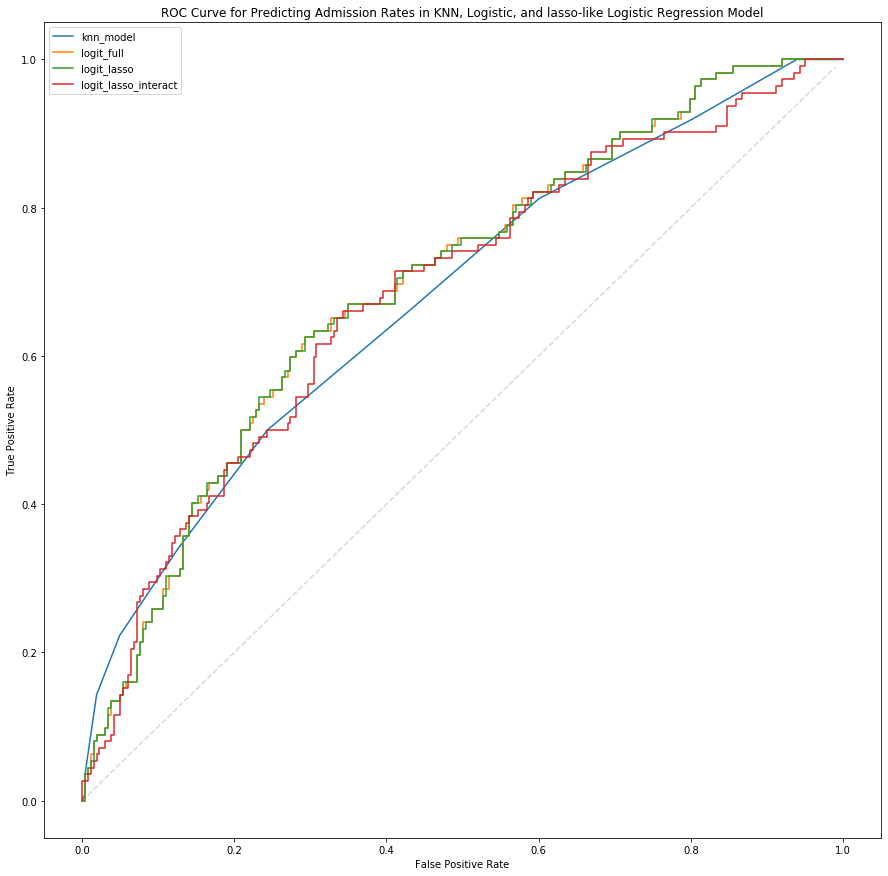

In [32]:
# your code here
models = [knn_model,logit_full,logit_lasso,logit_lasso_interact]
predictors = [knn_predictors, logit_predictors, lasso_predictors, interact_predictors]
plt.figure(figsize=(15,15))

# Empty list to store aucs for problem 5.3
aucs = []

for i in range(len(models)):
    y_hat = models[i].predict_proba(college_test[predictors[i]])[:,1]
    fpr, tpr, thresholds = roc_curve(college_test['admitted'], y_hat)
    x=np.arange(0,100)/100
    plt.plot(fpr,tpr,label=str(names[i]))
    aucs.append(roc_auc_score(college_test['admitted'], y_hat))

plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Predicting Admission Rates in KNN, Logistic, and lasso-like Logistic Regression Model")
plt.legend(loc='best')
plt.show()

**INTERPRETATION:**

*Your answer here*

At a glance, the ROC curves do not support that the knn_model performs better than logit_lasso_interact model because the blue line associated with the knn_model is not higher (more upwards and leftwards) than the red line associated with the logit_lasso_interact model. In fact, it seems that in the middle of our plot the logit_lasso_interact model is performing consistently better than the knn_model, although the knn_model does perform better at the extreme ranges of the plot, that is for very low true positive and false postive rates and for very high true positive and false positive rates. The ROC curves do support that the logit_full and logit_lasso models do perform better than the logit_lasso_interact model because their lines are higher (more upwards and leftwards) than the line for the logit_lasso_interact model for most of the plot.

<div class='exercise-r'>  
 
**5.3** Calculate and report AUC for all 4 models.  Do the rankings of these 4 models based on AUC match those for classification accuracy?  Why do you think this is the case?
 
 </div>

In [33]:
# your code here
# Note AUCs were calculated in the loop above
for i in range(len(names)):
    print("AUC for "+ names[i]+ ": " + str(round(aucs[i],4)))

AUC for knn_model: 0.6787
AUC for logit_full: 0.6965
AUC for logit_lasso: 0.6965
AUC for logit_lasso_interact: 0.6826


**INTERPRETATION:**

*Your answer here*

The rankings for the AUC don't match those for the classification accuracy. In fact, this time the knn_model performs the worst instead of the best like it did for classification accuracy. We still have that logit_full and logit_lasso outperform logit_lasso_interact like we did for classification accuracy, likely for the same reason of overfitting. Since the knn model does not actually assign effects to any of the predictor variables, it means that even though it can have a good classification accuracy, it also is more susceptible to false positives which hurt its performance on an AUC basis when compared to a logistic regression. In other words, on a sensitivity v specificity basis which is what AUC is measuring, KNN performs poorly since it doesn't predict using coefficient effects of the predictor variables.

**5.4** If you were to use one of these 4 models to present as a prediction model for the website [collegedata.com](https://www.collegedata.com/), which would you use?  What may be the biggest issue if this was a publicly available tool for college applicants to use to determine their chances of getting into Harvard and/or Yale?

**INTERPRETATION:**

*Your answer here*

Of the four models, I would use the lasso-like logistic regression since it performs consistently well on a classification accuracy and AUC basis. Moreover, it is preferable to the full Logistic Regression model because it can throw out any insignificant predictor variables wheras the full Logistic Regression model naively fits all the predictor variables. The biggest issue with using this model as a prediction model for the website would be that the data set that the model is based on is probably uncharacteristic of the real world. As we saw in question 1.6, this model has much higher admission rates than the true admission rates to Harvard and Yale, and because there is significant bias in the data set itself, we cannot be confident in our coefficient estimated effects of each of our predictor variables since those estimates themselves are likely biased too. In a sense, junk in will give junk out, and because there are obvious problems with our initial data set there are likely signficant underlying problems with our prediction model.